# Fashion-MNIST

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw


Extracting F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw



Extracting F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw


Extracting F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


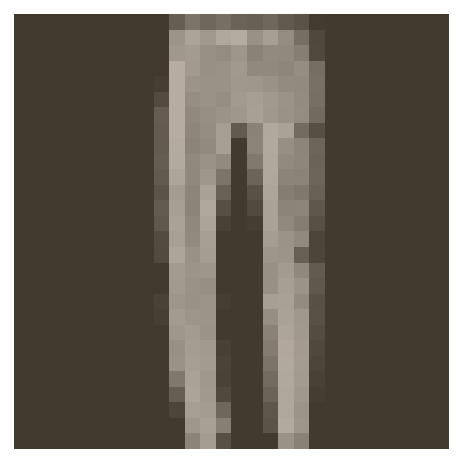

In [0]:
image, label = next(iter(trainloader))

image = image[0, :]
fig, ax = plt.subplots()
image = image.numpy().transpose((1, 2, 0))

# normalise
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image = std * image + mean
image = np.clip(image, 0, 1)

ax.imshow(image)

# remove unncessary stuff from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', length=0)
ax.set_xticklabels('')
ax.set_yticklabels('')

ax

In [0]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size)
)

model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 3
print_every = 40
steps = 0

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    steps += 1

    images.resize_(images.size()[0], 784) # unroll image batch
    optimizer.zero_grad() # zero out previous gradients
    output = model.forward(images) # forward-prop
    loss = criterion(output, labels) # compute loss
    loss.backward() # compute gradient
    optimizer.step() # update parameters using gradient

    running_loss += loss.item() # loss is scalar tensor (size 1)
    if steps%print_every == 0:
      print('Epoch{}/{}...'.format(e+1, epochs),
            'Loss {:.4f}'.format(running_loss/print_every))
      running_loss = 0

Epoch1/3... Loss 1.2918
Epoch1/3... Loss 0.7410
Epoch1/3... Loss 0.6275
Epoch1/3... Loss 0.5758
Epoch1/3... Loss 0.5406
Epoch1/3... Loss 0.4783
Epoch1/3... Loss 0.4906
Epoch1/3... Loss 0.5084
Epoch1/3... Loss 0.4964
Epoch1/3... Loss 0.4820
Epoch1/3... Loss 0.5038
Epoch1/3... Loss 0.4651
Epoch1/3... Loss 0.4679
Epoch1/3... Loss 0.4599
Epoch1/3... Loss 0.4986
Epoch1/3... Loss 0.4715
Epoch1/3... Loss 0.4524
Epoch1/3... Loss 0.3986
Epoch1/3... Loss 0.3977
Epoch1/3... Loss 0.4107
Epoch1/3... Loss 0.4488
Epoch1/3... Loss 0.4323
Epoch1/3... Loss 0.3954
Epoch2/3... Loss 0.2172
Epoch2/3... Loss 0.4228
Epoch2/3... Loss 0.3748
Epoch2/3... Loss 0.3937
Epoch2/3... Loss 0.4145
Epoch2/3... Loss 0.3923
Epoch2/3... Loss 0.3802
Epoch2/3... Loss 0.3886
Epoch2/3... Loss 0.3546
Epoch2/3... Loss 0.3892
Epoch2/3... Loss 0.3768
Epoch2/3... Loss 0.3922
Epoch2/3... Loss 0.3968
Epoch2/3... Loss 0.3689
Epoch2/3... Loss 0.3590
Epoch2/3... Loss 0.3680
Epoch2/3... Loss 0.4144
Epoch2/3... Loss 0.3704
Epoch2/3... Loss

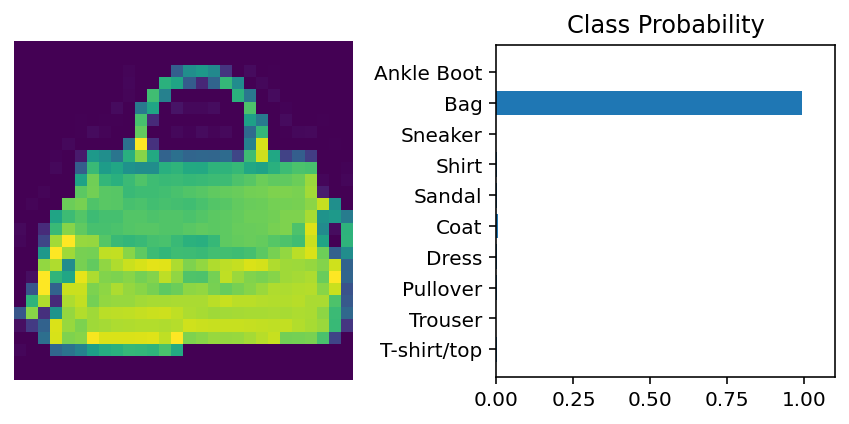

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[np.random.choice(images.size()[0])]

img = img.resize_(1, 784)

with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits, dim=1) # get class probabilities

img.resize_(1, 28, 28)
ps = ps.data.numpy().squeeze()
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(['T-shirt/top',
                     'Trouser',
                     'Pullover',
                     'Dress',
                     'Coat',
                     'Sandal',
                     'Shirt',
                     'Sneaker',
                     'Bag',
                     'Ankle Boot'], size='medium');

ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()